# LAB | Handling Data Imbalance in Classification Models | Wednesday

In [ ]:
#Healthcare for all dataset

#TARGET_B Target Variable: Binary Indicator for Response to 97NK Mailing (classification)
#TARGET_D Target Variable: Donation Amount (in \$) associated with the Response to 97NK Mailing (numerical)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm 

In [3]:
numerical = pd.read_csv('/Users/hollydalton/Downloads/numerical.csv')
numerical.shape

(95412, 315)

In [7]:
targets = pd.read_csv('/Users/hollydalton/Downloads/target.csv')
targets.shape

(95412, 2)

In [6]:
categorical = pd.read_csv('/Users/hollydalton/Downloads/categorical.csv')
categorical.shape

(95412, 22)

### First task: get dataframe down to 20-ish columns
    
-reduce 22 categorical columns to ~5

-reduce 315 numerical columns to ~15, using RFE

In [ ]:

#so we still have 315 numerical columns and 22 categorical
#first use RFE to reduce numerical columns to 20
#then for categoricals? we started with 31, since Tuesday morning we've had 22


#Chi-squared test is used to decide if feature has relationship with target
#maybe a few features i think are definitely important, if i have doubts about some, test them with Chi-2, but
#we don't have much time for that 
#15 numerical features, and 5 categorical features, categorical features will then expand 

In [8]:
categorical = categorical[]


,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11.0
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10.0
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1.0
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2.0
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2.0
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3.0
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10.0
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12.0


In [13]:
categorical['RFA_2R'].nunique()
categorical['RFA_2R'].value_counts()
#

L    95412
Name: RFA_2R, dtype: int64

In [14]:
categorical['RFA_2A'].value_counts()


F    46964
E    21639
G    19397
D     7412
Name: RFA_2A, dtype: int64

In [16]:
categorical.dtypes

STATE            object
CLUSTER           int64
HOMEOWNR         object
GENDER           object
DATASRCE          int64
RFA_2R           object
RFA_2A           object
GEOCODE2         object
DOMAIN_A         object
DOMAIN_B          int64
ODATEW_YR         int64
ODATEW_MM         int64
DOB_YR            int64
DOB_MM            int64
MINRDATE_YR       int64
MINRDATE_MM       int64
MAXRDATE_YR       int64
MAXRDATE_MM       int64
LASTDATE_YR       int64
LASTDATE_MM       int64
FIRSTDATE_YR      int64
FIRSTDATE_MM    float64
dtype: object

In [19]:
categorical = categorical[['STATE', 'GENDER', 'HOMEOWNR']].copy()
categorical  #new categorical df with 3 features

,STATE,GENDER,HOMEOWNR
0,IL,F,H
1,CA,M,H
2,NC,M,U
3,CA,F,U
4,FL,F,H
...,...,...,...
95407,other,M,H
95408,TX,M,H
95409,MI,M,H
95410,CA,F,H


In [ ]:
#Now use RFE for numerical columns

In [18]:
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [ ]:
#To choose top 17 numerical features, yesteday we used K-best for when the target is categorical to choose numerical features

In [ ]:
#numerical_1 = numerical[['RFA_2F', 'CARDGIFT', 'HVP1', 'HVP2', 'HVP3', 'HVP6','HVP4', 'ETH2', 'RP1','RP2', 'NGIFTALL', 'HV1', 'HV2', 'ETHC5', 'ETHC4', 'CARDPROM','NUMPROM', 'RP3', 'HVP5','CLUSTER2', 'INCOME', 'HV4','HV3', 'IC15', 'MSA']].copy()

In [42]:
numerical_1 = numerical[['RFA_2F', 'CARDGIFT', 'HVP1', 'ETH2', 'RP1', 'INCOME', 'IC15', 'MSA', 'CONTROLN', 'HC6','POBC2','MHUC1']].copy()

In [43]:
numerical_1

#RFA_2F,CARDGIFT,HVP1,ETH2,RP1,NGIFTALL,HV1,ETHC5,CARDPROM,NUMPROM,RP3,CLUSTER2,INCOME,IC15,MSA,CONTROLN,
#HHAS4,HC6,POBC2,MHUC1

,RFA_2F,CARDGIFT,HVP1,ETH2,RP1,INCOME,IC15,MSA,CONTROLN,HC6,POBC2,MHUC1
0,4,14,2,1,2,5,4,0.0,95515,31,74,6
1,2,1,97,0,91,6,2,4480.0,148535,97,39,20
2,4,14,0,2,0,3,20,0.0,15078,50,84,9
3,4,7,10,0,1,1,35,9340.0,172556,39,67,16
4,2,8,0,98,25,3,21,5000.0,7112,6,65,6
...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,0,2,10,69,5,9,380.0,184568,78,26,16
95408,1,0,18,3,16,7,10,3360.0,122706,94,51,18
95409,3,4,0,14,3,5,26,4040.0,189641,0,82,5
95410,4,18,89,1,88,7,4,8735.0,4693,17,50,12


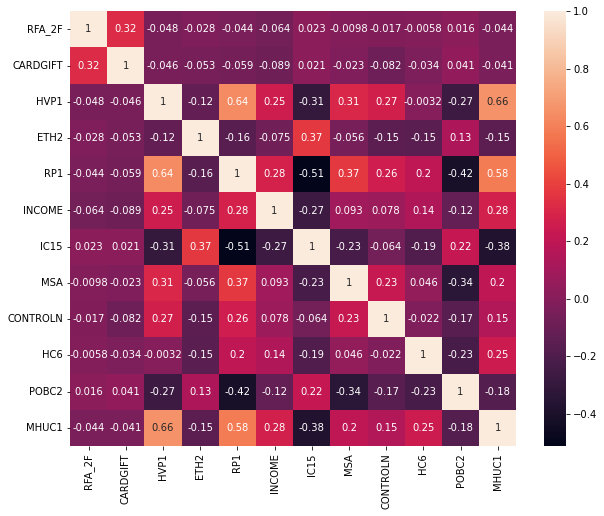

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=numerical_1.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#ok, i have the top 12 numerical columns based on K-best, with multi-collinearity less than .70
#next, put num and cat back together and actually start lab...

In [45]:
categorical

,STATE,GENDER,HOMEOWNR
0,IL,F,H
1,CA,M,H
2,NC,M,U
3,CA,F,U
4,FL,F,H
...,...,...,...
95407,other,M,H
95408,TX,M,H
95409,MI,M,H
95410,CA,F,H


In [48]:
numerical = numerical_1
numerical.dtypes

RFA_2F        int64
CARDGIFT      int64
HVP1          int64
ETH2          int64
RP1           int64
INCOME        int64
IC15          int64
MSA         float64
CONTROLN      int64
HC6           int64
POBC2         int64
MHUC1         int64
dtype: object

In [49]:
categorical.dtypes

STATE       object
GENDER      object
HOMEOWNR    object
dtype: object

In [50]:
data = pd.concat([numerical, categorical],axis=1)
data

,RFA_2F,CARDGIFT,HVP1,ETH2,RP1,INCOME,IC15,MSA,CONTROLN,HC6,POBC2,MHUC1,STATE,GENDER,HOMEOWNR
0,4,14,2,1,2,5,4,0.0,95515,31,74,6,IL,F,H
1,2,1,97,0,91,6,2,4480.0,148535,97,39,20,CA,M,H
2,4,14,0,2,0,3,20,0.0,15078,50,84,9,NC,M,U
3,4,7,10,0,1,1,35,9340.0,172556,39,67,16,CA,F,U
4,2,8,0,98,25,3,21,5000.0,7112,6,65,6,FL,F,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,0,2,10,69,5,9,380.0,184568,78,26,16,other,M,H
95408,1,0,18,3,16,7,10,3360.0,122706,94,51,18,TX,M,H
95409,3,4,0,14,3,5,26,4040.0,189641,0,82,5,MI,M,H
95410,4,18,89,1,88,7,4,8735.0,4693,17,50,12,CA,F,H


In [51]:
data.isnull().values.any()

False

In [52]:
targets

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [55]:
y= targets['TARGET_B']
X= data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [56]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num= X_test.select_dtypes(include = np.number)

X_train_cat=X_train.select_dtypes(include = object)
X_test_cat=X_test.select_dtypes(include = object)

In [62]:
print(X_train_num.shape)
X_train_cat.shape

(76329, 12)


(76329, 3)

In [63]:
print(X_test_num.shape)
X_test_cat.shape

(19083, 12)


(19083, 3)

#### First scaling X_train_num and encoding X_train_cat

In [64]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#Using min/max scaler for X_train

transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,RFA_2F,CARDGIFT,HVP1,ETH2,RP1,INCOME,IC15,MSA,CONTROLN,HC6,POBC2,MHUC1
0,0.333333,0.055556,0.000000,0.020202,0.010101,0.833333,0.262626,0.752137,0.509954,0.000000,0.626263,0.238095
1,1.000000,0.083333,0.000000,0.010101,0.212121,0.333333,0.060606,0.688034,0.909749,0.575758,0.676768,0.428571
2,0.666667,0.138889,0.141414,0.030303,0.373737,0.833333,0.101010,0.205128,0.606703,0.828283,0.595960,0.428571
3,0.666667,0.694444,0.000000,0.000000,0.000000,0.666667,0.282828,0.000000,0.416533,0.575758,0.696970,0.238095
4,0.000000,0.027778,0.000000,0.000000,0.000000,0.166667,0.242424,0.000000,0.500130,0.242424,0.838384,0.238095
...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.000000,0.055556,0.030303,0.030303,0.878788,0.166667,0.030303,0.040598,0.963306,0.989899,0.171717,0.619048
76325,0.000000,0.000000,0.020202,0.000000,0.050505,0.166667,0.202020,0.000000,0.114639,0.606061,0.535354,0.428571
76326,0.000000,0.027778,0.010101,0.010101,0.343434,0.666667,0.050505,0.542735,0.403147,0.212121,0.828283,0.523810
76327,0.000000,0.305556,0.010101,0.030303,0.010101,0.333333,0.333333,0.000000,0.304339,0.141414,0.737374,0.238095


In [69]:
X_train_cat #Should all be one-hot encoded, no natural hierarchy 

,STATE,GENDER,HOMEOWNR
88309,IL,F,H
49426,other,F,H
74450,TX,F,U
67492,WI,M,H
24531,IL,M,H
...,...,...,...
87513,other,M,U
85159,NC,F,U
9448,WI,F,H
57533,other,F,H


In [72]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first').fit(X_train_cat) 
encoded = encoder.transform(X_train_cat).toarray()
encoded_columns = OneHotEncoder(drop='first').fit(X_train_cat).get_feature_names_out(input_features=X_train_cat.columns) 
#this allows us to get the columns names for our encoded array

X_train_cat_encoded = pd.DataFrame(encoded, columns = encoded_columns)
X_train_cat_encoded

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,GENDER_M,GENDER_other,HOMEOWNR_U
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
76325,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
76327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [146]:
y_train.shape

(76329,)

In [73]:
X_train_processed = np.concatenate([X_train_norm, X_train_cat_encoded], axis=1,)


X_train_processed = pd.DataFrame(X_train_processed)
X_train_processed   #this is all the training data encoded and scaled!! 

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.333333,0.055556,0.000000,0.020202,0.010101,0.833333,0.262626,0.752137,0.509954,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.083333,0.000000,0.010101,0.212121,0.333333,0.060606,0.688034,0.909749,0.575758,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.666667,0.138889,0.141414,0.030303,0.373737,0.833333,0.101010,0.205128,0.606703,0.828283,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.666667,0.694444,0.000000,0.000000,0.000000,0.666667,0.282828,0.000000,0.416533,0.575758,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.000000,0.027778,0.000000,0.000000,0.000000,0.166667,0.242424,0.000000,0.500130,0.242424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.000000,0.055556,0.030303,0.030303,0.878788,0.166667,0.030303,0.040598,0.963306,0.989899,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
76325,0.000000,0.000000,0.020202,0.000000,0.050505,0.166667,0.202020,0.000000,0.114639,0.606061,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76326,0.000000,0.027778,0.010101,0.010101,0.343434,0.666667,0.050505,0.542735,0.403147,0.212121,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
76327,0.000000,0.305556,0.010101,0.030303,0.010101,0.333333,0.333333,0.000000,0.304339,0.141414,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Next, do same thing with test data

In [74]:
#using same transformer as in the train set
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm

#should we drop MSA? it's a code, not really a number

,RFA_2F,CARDGIFT,HVP1,ETH2,RP1,INCOME,IC15,MSA,CONTROLN,HC6,POBC2,MHUC1
0,0.000000,0.055556,0.050505,0.494949,0.737374,0.666667,0.090909,0.478632,0.754307,0.000000,0.484848,0.428571
1,1.000000,0.138889,0.000000,0.000000,0.444444,0.666667,0.222222,0.230769,0.359065,0.414141,0.717172,0.333333
2,1.000000,0.083333,0.040404,0.151515,0.424242,0.500000,0.161616,0.478632,0.754323,0.000000,0.464646,0.476190
3,0.333333,0.388889,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.499744,0.232323,0.787879,0.476190
4,0.333333,0.027778,0.010101,0.000000,0.040404,0.500000,0.272727,0.000000,0.450270,0.686869,0.555556,0.380952
...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.000000,0.027778,0.000000,0.000000,0.161616,0.500000,0.181818,0.662393,0.715204,0.969697,0.010101,0.238095
19079,0.000000,0.027778,0.848485,0.030303,0.252525,0.666667,0.040404,0.931624,0.893918,0.878788,0.616162,0.619048
19080,0.000000,0.250000,0.000000,0.343434,0.000000,0.000000,0.313131,0.000000,0.104940,0.515152,0.909091,0.380952
19081,0.000000,0.027778,0.000000,0.000000,0.000000,0.833333,0.000000,0.884615,0.214333,0.000000,0.000000,0.000000


In [75]:
#using same encoder as above
encoded = encoder.transform(X_test_cat).toarray()
encoded_columns = OneHotEncoder(drop='first').fit(X_test_cat).get_feature_names_out(input_features=X_test_cat.columns) 
#this allows us to get the columns names for our encoded array

X_test_cat_encoded = pd.DataFrame(encoded, columns = encoded_columns)
X_test_cat_encoded

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,GENDER_M,GENDER_other,HOMEOWNR_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19081,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
X_test_processed = np.concatenate([X_test_norm, X_test_cat_encoded], axis=1)

X_test_processed = pd.DataFrame(X_test_processed)
X_test_processed   #here we have a dataframe with all the test data encoded and scaled!

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.000000,0.055556,0.050505,0.494949,0.737374,0.666667,0.090909,0.478632,0.754307,0.000000,0.484848,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.000000,0.138889,0.000000,0.000000,0.444444,0.666667,0.222222,0.230769,0.359065,0.414141,0.717172,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.083333,0.040404,0.151515,0.424242,0.500000,0.161616,0.478632,0.754323,0.000000,0.464646,0.476190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.388889,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.499744,0.232323,0.787879,0.476190,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.333333,0.027778,0.010101,0.000000,0.040404,0.500000,0.272727,0.000000,0.450270,0.686869,0.555556,0.380952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.000000,0.027778,0.000000,0.000000,0.161616,0.500000,0.181818,0.662393,0.715204,0.969697,0.010101,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19079,0.000000,0.027778,0.848485,0.030303,0.252525,0.666667,0.040404,0.931624,0.893918,0.878788,0.616162,0.619048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19080,0.000000,0.250000,0.000000,0.343434,0.000000,0.000000,0.313131,0.000000,0.104940,0.515152,0.909091,0.380952,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19081,0.000000,0.027778,0.000000,0.000000,0.000000,0.833333,0.000000,0.884615,0.214333,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
y_train.head(5)

88309    0
49426    0
74450    0
67492    0
24531    0
Name: TARGET_B, dtype: int64

In [103]:
y_test.head(5)

72627    0
16269    0
19026    0
11620    0
73959    0
Name: TARGET_B, dtype: int64

In [104]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 
#Drop=true is used to reset index, so that the original index isn't added as a column

In [105]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET_B, dtype: int64

In [106]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_processed, y_train)
#solver is whatever math you use to find 
#logistic regression uses a mathematical method to find the optimal value of the parameters
#of the best line

In [107]:
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_processed, y_train)

In [108]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_processed)
predictions
classification.score(X_test_processed, y_test)

0.9468112980139392

In [109]:
print(y_test.value_counts())


0    18068
1     1015
Name: TARGET_B, dtype: int64


In [110]:
pd.Series(predictions).value_counts()
#so this means we predicted 0 (No donation) for every single row?
#we didn't predict any Yes, we get a high p-value because we predicted ALL 0s, and because this
#data is so imbalanced, that ends up with a good model, but what we actually want is to
#correctly select and predict those 1015 people that DID donate 

0    19083
dtype: int64

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
#predicted 18,068 Nos that were really Nos
#predicted 0 Yes but there were actually 1015 Yes
#we want to accurately predict the minority class, the Yes (1) column 

#There were actually 18068 No, and 1015 yes
#First 0 means 0 times we correctly predicted Yes, (we never guessed a Yes when it was really No)
## of False Positives

#Second 0 means 0 times we predicted Yes and it was really a Yes (we never guessed a Yes)
# # of True positives 

array([[18068,     0],
       [ 1015,     0]])

In [ ]:
# predicted | 0 | 1 | 
# --------------------------
# actual  0 | + |  | 
# --------------------------
#         1 |   | +

In [97]:
X_test_processed

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.000000,0.055556,0.050505,0.494949,0.737374,0.666667,0.090909,0.478632,0.754307,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.000000,0.138889,0.000000,0.000000,0.444444,0.666667,0.222222,0.230769,0.359065,0.414141,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.083333,0.040404,0.151515,0.424242,0.500000,0.161616,0.478632,0.754323,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.388889,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.499744,0.232323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.333333,0.027778,0.010101,0.000000,0.040404,0.500000,0.272727,0.000000,0.450270,0.686869,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.000000,0.027778,0.000000,0.000000,0.161616,0.500000,0.181818,0.662393,0.715204,0.969697,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19079,0.000000,0.027778,0.848485,0.030303,0.252525,0.666667,0.040404,0.931624,0.893918,0.878788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19080,0.000000,0.250000,0.000000,0.343434,0.000000,0.000000,0.313131,0.000000,0.104940,0.515152,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19081,0.000000,0.027778,0.000000,0.000000,0.000000,0.833333,0.000000,0.884615,0.214333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
print(y_test)
y_test.value_counts()

0        0
1        0
2        0
3        0
4        0
        ..
19078    0
19079    0
19080    0
19081    0
19082    0
Name: TARGET_B, Length: 19083, dtype: int64


0    18068
1     1015
Name: TARGET_B, dtype: int64

### Quick recap of precision, recall, and f1 score:

#### PRECISION
print("precision: ",precision_score(y_test,pred))

Precision tells us of the cases where we predicted a 1 (Yes), how often were we correct? 

#### RECALL
print("recall: ",recall_score(y_test,pred))

Recall tells us out of all the Yes (1) cases, how many did we predict?
Recall is very important in this lab, where we ultimately want to maximize this, the instances
of the minority class being correctly predicted

#### F1
print("f1: ",f1_score(y_test,pred))

F1 is a general number of getting it right, harmonic mean of precision and recall 

F1 is high if both precision and recall are relatively high. Use F1 if you can't decide which is more important, precision or recall

This is a personal judgement call

Example--- there' a disease that is deadly, so you want to correctly predict  as many positives as possible, but if you have a lot of false positives, performing tests on someone who isn't actually positive can also be dangerous. 

#### Ultimately...
You want to get accurate prediction of minority classes here, but it depends on your goals and 
the realm your analzying to decide which evaluation metric to optimize

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#LR = LogisticRegression(max_iter=1000)
#LR.fit(X_train_processed, y_train)
pred = LR.predict(X_test_processed)

print("precision: ",precision_score(y_test,pred))
#tells us of the cases where we predicted a 1, how often were we correct? 

print("recall: ",recall_score(y_test,pred))
#out of all the diabetes cases, how many did we identify?

print("f1: ",f1_score(y_test,pred))
#general number of getting it right, harmonic mean of precision and recall 

precision:  0.0
recall:  0.0
f1:  0.0


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#getting the above error because our model happened to predict 0 Yes 
#There were actually 18068 No, and 1015 yes, but our model predicted 19083 Nos

#First 0 means 0 times we correctly predicted Yes, (we never guessed a Yes when it was really No) 
#Second 0 means 0 times we predicted Yes and it was really a Yes (we never guessed a Yes)


Precision = TruePositives / (TruePositives + FalsePositives)
Precision = 0/ (0+0) = ??

Recall = TruePositives / (TruePositives + FalseNegatives)
Recall = 0 / (0 + 0) = ?? 


### Managing imbalance in the dataset

Check for the imbalance.


Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.


Each time fit the model and see how the accuracy of the model is.

### the correct order:
    
1. train-test split
2. train scaler/encoders
3. transform train
4. up/downsample train (DO NOT up/downsample test)
5. then train the model
6. transform test
7. evaluate the model using test

In [269]:
#first, make dataframe that has X_train and y_train processed (encoded and scaled) together
#why? because we can only treat the imbalance on the TRAINING data!! 

trained_data = pd.DataFrame(X_train_processed)
trained_data['TARGET_B']= y_train
#trained_data = trained_data.drop(['Target_B'], axis=1)

trained_data

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,TARGET_B
0,0.333333,0.055556,0.000000,0.020202,0.010101,0.833333,0.262626,0.752137,0.509954,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.000000,0.083333,0.000000,0.010101,0.212121,0.333333,0.060606,0.688034,0.909749,0.575758,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.666667,0.138889,0.141414,0.030303,0.373737,0.833333,0.101010,0.205128,0.606703,0.828283,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.666667,0.694444,0.000000,0.000000,0.000000,0.666667,0.282828,0.000000,0.416533,0.575758,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,0.000000,0.027778,0.000000,0.000000,0.000000,0.166667,0.242424,0.000000,0.500130,0.242424,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.000000,0.055556,0.030303,0.030303,0.878788,0.166667,0.030303,0.040598,0.963306,0.989899,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0
76325,0.000000,0.000000,0.020202,0.000000,0.050505,0.166667,0.202020,0.000000,0.114639,0.606061,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
76326,0.000000,0.027778,0.010101,0.010101,0.343434,0.666667,0.050505,0.542735,0.403147,0.212121,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
76327,0.000000,0.305556,0.010101,0.030303,0.010101,0.333333,0.333333,0.000000,0.304339,0.141414,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [155]:
trained_data['TARGET_B'].value_counts()

#Yes there's a data imbalance in the training data for the target feature. 
#downsampling or upsampling, neither are very attractive but if we didn't, predict the majority class too often. 


0    72501
1     3828
Name: TARGET_B, dtype: int64

In [156]:
from sklearn.utils import resample

category_0 = trained_data[trained_data['TARGET_B'] == 0]   #majority class
category_1 = trained_data[trained_data['TARGET_B'] == 1]   #minority class

In [158]:
category_0.shape

(72501, 27)

In [159]:
category_1.shape

(3828, 27)

### Downsampling

In [160]:
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

#leave category_1 as it is, but create new dataframe, ~3828 samples from category_1 and put it into
#category_0

#in downsampling, we are making the dataframe fit the number of rows as in the minority class, so eliminating
#majority class rows

In [161]:
print(category_0_undersampled.shape)
print(category_1.shape)
#now category_0 and category_1 will have same number of rows

(3828, 27)
(3828, 27)


In [168]:
train_data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)
#put rows ontop of each other, not next to each other

In [169]:
train_data_downsampled['TARGET_B'].value_counts()
#now see we have same number of rows for 0 and 1

0    3828
1    3828
Name: TARGET_B, dtype: int64

In [172]:
X_train_downsampled = train_data_downsampled.drop(['TARGET_B'], axis=1)
y_train_downsampled = train_data_downsampled['TARGET_B']


print(X_train_downsampled.shape)
y_train_downsampled.shape

(7656, 26)


(7656,)

In [270]:
X_train_downsampled

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
40758,0.666667,0.138889,0.000000,0.000000,0.030303,0.666667,0.080808,0.000000,0.418858,0.020202,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2968,0.000000,0.138889,0.121212,0.010101,0.525253,0.666667,0.050505,0.547009,0.055408,0.838384,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
18149,1.000000,0.194444,0.151515,0.020202,0.343434,0.666667,0.252525,0.478632,0.749635,0.060606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38708,0.666667,0.194444,0.121212,0.000000,0.363636,0.833333,0.030303,0.170940,0.489373,0.080808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43652,0.000000,0.222222,0.919192,0.020202,0.878788,0.666667,0.000000,0.790598,0.877560,0.171717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76222,0.333333,0.222222,0.010101,0.080808,0.000000,0.500000,0.000000,0.351496,0.111239,0.474747,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
76229,0.000000,0.305556,0.000000,0.000000,0.020202,0.666667,0.111111,0.081197,0.571172,0.282828,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76253,0.666667,0.222222,0.282828,0.020202,0.858586,0.666667,0.010101,0.662393,0.759542,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76285,1.000000,0.277778,0.010101,0.010101,0.131313,0.666667,0.101010,0.688034,0.912596,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Upsampling

In [284]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

#in upsampling, we do the opposite of downsampling, we are making the minority class fit the number of rows
#as the majority class 
#replace= True makes sure you can pick the same row several times to upsample 
#it's also possible to use a bit of upsampling and a bit of downsampling to meet in the middle

In [285]:
print(category_0.shape)
print(category_1_oversampled.shape)
#now each category has the same number of rows

(72501, 27)
(72501, 27)


In [286]:
train_data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [287]:
train_data_upsampled['TARGET_B'].value_counts()

0    72501
1    72501
Name: TARGET_B, dtype: int64

In [288]:
train_data_upsampled

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,TARGET_B
0,0.333333,0.055556,0.000000,0.020202,0.010101,0.833333,0.262626,0.752137,0.509954,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.000000,0.083333,0.000000,0.010101,0.212121,0.333333,0.060606,0.688034,0.909749,0.575758,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.666667,0.138889,0.141414,0.030303,0.373737,0.833333,0.101010,0.205128,0.606703,0.828283,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.666667,0.694444,0.000000,0.000000,0.000000,0.666667,0.282828,0.000000,0.416533,0.575758,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,0.000000,0.027778,0.000000,0.000000,0.000000,0.166667,0.242424,0.000000,0.500130,0.242424,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62609,0.333333,0.083333,0.000000,0.040404,0.030303,0.500000,0.494949,0.358974,0.630465,0.080808,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3997,0.333333,0.250000,0.000000,0.000000,0.454545,0.500000,0.101010,0.000000,0.825901,0.919192,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
17121,0.000000,0.055556,0.000000,0.010101,0.787879,1.000000,0.030303,0.299145,0.619144,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
34233,0.000000,0.083333,0.707071,0.010101,0.525253,0.833333,0.060606,0.635150,0.819717,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [289]:
X_train_upsampled = train_data_upsampled.drop(['TARGET_B'], axis=1)
y_train_upsampled = train_data_upsampled['TARGET_B']


print(X_train_upsampled.shape)
y_train_upsampled.shape

(145002, 26)


(145002,)

In [290]:
X_train_upsampled

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.333333,0.055556,0.000000,0.020202,0.010101,0.833333,0.262626,0.752137,0.509954,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.083333,0.000000,0.010101,0.212121,0.333333,0.060606,0.688034,0.909749,0.575758,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.666667,0.138889,0.141414,0.030303,0.373737,0.833333,0.101010,0.205128,0.606703,0.828283,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.666667,0.694444,0.000000,0.000000,0.000000,0.666667,0.282828,0.000000,0.416533,0.575758,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.000000,0.027778,0.000000,0.000000,0.000000,0.166667,0.242424,0.000000,0.500130,0.242424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62609,0.333333,0.083333,0.000000,0.040404,0.030303,0.500000,0.494949,0.358974,0.630465,0.080808,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3997,0.333333,0.250000,0.000000,0.000000,0.454545,0.500000,0.101010,0.000000,0.825901,0.919192,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
17121,0.000000,0.055556,0.000000,0.010101,0.787879,1.000000,0.030303,0.299145,0.619144,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34233,0.000000,0.083333,0.707071,0.010101,0.525253,0.833333,0.060606,0.635150,0.819717,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now run the logistic regression model on the UPSAMPLED training dataset

In [273]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_upsampled, y_train_upsampled)

In [274]:
predictions = classification.predict(X_test_processed)
predictions
classification.score(X_test_processed, y_test)

0.6235916784572656

In [275]:
pd.Series(predictions).value_counts()

0    11865
1     7218
dtype: int64

In [276]:
print(y_test.value_counts())

0    18068
1     1015
Name: TARGET_B, dtype: int64


In [277]:
confusion_matrix(y_test, predictions)

array([[11375,  6693],
       [  490,   525]])

In [230]:
# predicted | 0 | 1 | 
# --------------------------
# actual  0 | + |  | 
# --------------------------
#         1 |   | +

In [278]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_upsampled, y_train_upsampled)
pred = LR.predict(X_test_processed)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.07273482959268496
recall:  0.5172413793103449
f1:  0.1275355277541601


### Now run the logistic regression model using the DOWNSAMPLED training dataset

In [245]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_downsampled, y_train_downsampled)

In [246]:
predictions = classification.predict(X_test_processed)
predictions
classification.score(X_test_processed, y_test)

0.6110674422260651

In [247]:
pd.Series(predictions).value_counts()


0    11592
1     7491
dtype: int64

In [248]:
print(y_test.value_counts())

0    18068
1     1015
Name: TARGET_B, dtype: int64


In [249]:
confusion_matrix(y_test, predictions)


array([[11119,  6949],
       [  473,   542]])

In [237]:
# predicted | 0 | 1 | 
# --------------------------
# actual  0 | + |  | 
# --------------------------
#         1 |   | +

In [260]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_downsampled, y_train_downsampled)
pred = LR.predict(X_test_processed)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.07236490101658641
recall:  0.5330049261083744
f1:  0.12742904251560475


In [ ]:
#Conclusion-- both upsampling and downsampling improve results, but only slightly. 
#We correctly predicted more YES, but at the expense of incorrectly predicting a lot YES when it was really a NO

#   Lab 1 | Random Forests | Thursday

For this lab, you will be using the CSV files provided in the files_for_lab folder.

Instructions


Apply the Random Forests algorithm but this time only by upsampling the data.


Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

In [294]:
X_train_upsampled
#why does this keep being converted back to it's original unscaled unencoded past????!!

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.333333,0.055556,0.000000,0.020202,0.010101,0.833333,0.262626,0.752137,0.509954,0.000000,0.626263,0.238095,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.083333,0.000000,0.010101,0.212121,0.333333,0.060606,0.688034,0.909749,0.575758,0.676768,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.666667,0.138889,0.141414,0.030303,0.373737,0.833333,0.101010,0.205128,0.606703,0.828283,0.595960,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.666667,0.694444,0.000000,0.000000,0.000000,0.666667,0.282828,0.000000,0.416533,0.575758,0.696970,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.000000,0.027778,0.000000,0.000000,0.000000,0.166667,0.242424,0.000000,0.500130,0.242424,0.838384,0.238095,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62609,0.333333,0.083333,0.000000,0.040404,0.030303,0.500000,0.494949,0.358974,0.630465,0.080808,0.555556,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3997,0.333333,0.250000,0.000000,0.000000,0.454545,0.500000,0.101010,0.000000,0.825901,0.919192,0.222222,0.380952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
17121,0.000000,0.055556,0.000000,0.010101,0.787879,1.000000,0.030303,0.299145,0.619144,1.000000,0.434343,0.476190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34233,0.000000,0.083333,0.707071,0.010101,0.525253,0.833333,0.060606,0.635150,0.819717,0.272727,0.505051,0.523810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [301]:
X_test_processed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.000000,0.055556,0.050505,0.494949,0.737374,0.666667,0.090909,0.478632,0.754307,0.000000,0.484848,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.000000,0.138889,0.000000,0.000000,0.444444,0.666667,0.222222,0.230769,0.359065,0.414141,0.717172,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.083333,0.040404,0.151515,0.424242,0.500000,0.161616,0.478632,0.754323,0.000000,0.464646,0.476190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.388889,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.499744,0.232323,0.787879,0.476190,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.333333,0.027778,0.010101,0.000000,0.040404,0.500000,0.272727,0.000000,0.450270,0.686869,0.555556,0.380952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.000000,0.027778,0.000000,0.000000,0.161616,0.500000,0.181818,0.662393,0.715204,0.969697,0.010101,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19079,0.000000,0.027778,0.848485,0.030303,0.252525,0.666667,0.040404,0.931624,0.893918,0.878788,0.616162,0.619048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19080,0.000000,0.250000,0.000000,0.343434,0.000000,0.000000,0.313131,0.000000,0.104940,0.515152,0.909091,0.380952,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19081,0.000000,0.027778,0.000000,0.000000,0.000000,0.833333,0.000000,0.884615,0.214333,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [302]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#Setting the parameters
clf = RandomForestClassifier(max_depth=5,         #max number of questions to ask     
                             min_samples_split=20,  #amount of samples still considered at every question
                             min_samples_leaf =20,   #ultimate answer at each leaf (bottom of tree) based on at least this many rows
                             max_samples=0.8,         #fraction of X_train to use in each tree
                             random_state = 42)
#max depth of each tree in our forest is 5, min sample is 20, 
#max_sample-- how many of the samples should I use in each of the trees
#if don't specify, will use default which is that all the trees will use all the data 

#next step is to train the classifier (clf)
clf.fit(X_train_upsampled, y_train_upsampled)
print(clf.score(X_train_upsampled, y_train_upsampled))
print(clf.score(X_test_processed, y_test))
#100 trees being built, that is the default setting, which Jan said is good to use


y_pred = clf.predict(X_test_processed)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))
#can see we are still making a lot of errors 
#probably we have used too many features ?
#we know this is still subject to variation, due to the randomization, will get slightly
#different results if run it again, but more or less, the same

#test is slightly better than train? 

0.6076123087957408
0.6310328564691087


0    18068
1     1015
Name: TARGET_B, dtype: int64

array([[11519,  6549],
       [  492,   523]])

In [303]:
# For cross validation
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=.8)
cross_val_scores = cross_val_score(clf, X_train_upsampled, y_train_upsampled, cv=10)  #gives as output only the score/result of the CLF (the accuracy, validation on the train)
print(np.mean(cross_val_scores))

0.6050123839259599


#### Discuss the output and its impact in the bussiness scenario. 

Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

#### False positive- we expect someone to donate, but they don't

#### False negative- we expect someone not to donate, but they do. 

No, a false positive is worse than a false negative. Here, we are trying to determine which previous donors, will
donate again. If we expect someone to donate and they don't, we lose money. Whereas if we expect someone
not to donate, but they do, that's good news. 

To maximize the return of the business/mailings, we should optimize the model to get as FEW false positives as possible.
Ideally, we'd predict all true positives and it there are false negatives, that's not bad.
The worst case would be lots of false positives. 

# Lab 2 | Final regression model in "Health Care for All" Case | Thursday

Instructions


At this point, we have created a model to predict who will make a donation and who won't. But, what about the ammount of money that each person will give? In this lab, subset those that made a donation and use that subset to create a model to predict how much money will they give.

Evaluate the result of your model and estimate how much better the result are for the bussiness in comparison with the naive scenario we discuss on Monday.

In [314]:
targetD_data = pd.concat([data, targets],axis=1)
targetD_data

,RFA_2F,CARDGIFT,HVP1,ETH2,RP1,INCOME,IC15,MSA,CONTROLN,HC6,POBC2,MHUC1,STATE,GENDER,HOMEOWNR,TARGET_B,TARGET_D
0,4,14,2,1,2,5,4,0.0,95515,31,74,6,IL,F,H,0,0.0
1,2,1,97,0,91,6,2,4480.0,148535,97,39,20,CA,M,H,0,0.0
2,4,14,0,2,0,3,20,0.0,15078,50,84,9,NC,M,U,0,0.0
3,4,7,10,0,1,1,35,9340.0,172556,39,67,16,CA,F,U,0,0.0
4,2,8,0,98,25,3,21,5000.0,7112,6,65,6,FL,F,H,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,0,2,10,69,5,9,380.0,184568,78,26,16,other,M,H,0,0.0
95408,1,0,18,3,16,7,10,3360.0,122706,94,51,18,TX,M,H,0,0.0
95409,3,4,0,14,3,5,26,4040.0,189641,0,82,5,MI,M,H,0,0.0
95410,4,18,89,1,88,7,4,8735.0,4693,17,50,12,CA,F,H,1,18.0


In [316]:
targetD_data=targetD_data[targetD_data['TARGET_D'] != 0]
targetD_data = targetD_data.drop(['TARGET_B'], axis=1)

targetD_data

,RFA_2F,CARDGIFT,HVP1,ETH2,RP1,INCOME,IC15,MSA,CONTROLN,HC6,POBC2,MHUC1,STATE,GENDER,HOMEOWNR,TARGET_D
20,3,10,0,1,95,3,4,5120.0,82943,91,58,9,other,F,H,4.0
30,3,6,4,2,78,5,3,2920.0,190313,95,48,12,TX,M,H,7.0
45,3,14,15,0,39,5,1,1360.0,76585,81,66,11,other,F,H,5.0
78,2,5,99,0,92,6,4,5945.0,156378,38,48,8,CA,F,H,13.0
93,3,8,0,93,69,1,4,520.0,25641,8,71,7,GA,M,H,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,1,16,2,1,13,5,26,6780.0,154544,43,35,6,CA,F,H,20.0
95309,1,2,23,1,58,5,5,6920.0,171302,85,58,12,CA,F,H,15.0
95398,3,4,1,12,30,5,2,5080.0,78831,53,72,8,WI,F,H,3.0
95403,1,6,0,0,0,4,14,0.0,84678,40,85,7,other,F,H,10.0


#### X/y split, train/test split, cat/num split 

In [323]:
y= targetD_data['TARGET_D']
X= targetD_data.drop(['TARGET_D'], axis=1)

print(y.shape)
X.shape

(4843,)


(4843, 15)

In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [325]:
X_train.shape

(3874, 15)

In [327]:
X_test.shape

(969, 15)

In [328]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num= X_test.select_dtypes(include = np.number)

X_train_cat=X_train.select_dtypes(include = object)
X_test_cat=X_test.select_dtypes(include = object)

#### Use scaler to transform X_train_num

In [329]:
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,RFA_2F,CARDGIFT,HVP1,ETH2,RP1,INCOME,IC15,MSA,CONTROLN,HC6,POBC2,MHUC1
0,1.000000,0.195122,0.000000,0.111111,0.262626,0.166667,0.141414,0.440171,0.736644,0.878788,0.232323,0.333333
1,0.666667,0.463415,0.000000,0.272727,0.010101,0.666667,0.242424,0.000000,0.288788,0.575758,0.808081,0.428571
2,0.000000,0.024390,0.000000,1.000000,0.020202,0.500000,0.212121,0.333333,0.080160,0.000000,0.888889,0.285714
3,1.000000,0.146341,0.030303,0.101010,0.878788,0.666667,0.040404,0.571047,0.225904,1.000000,0.171717,0.333333
4,0.000000,0.024390,0.000000,0.000000,0.000000,0.333333,0.222222,0.000000,0.421089,0.505051,0.818182,0.238095
...,...,...,...,...,...,...,...,...,...,...,...,...
3869,0.666667,0.073171,0.202020,0.000000,0.696970,0.666667,0.111111,0.215812,0.167839,0.696970,0.090909,0.380952
3870,0.666667,0.121951,0.191919,0.010101,0.929293,1.000000,0.010101,0.170940,0.471760,0.919192,0.757576,0.476190
3871,0.666667,0.121951,0.101010,0.050505,0.595960,0.500000,0.050505,0.739316,0.896598,0.878788,0.606061,0.476190
3872,0.000000,0.073171,0.969697,0.000000,0.444444,0.666667,0.000000,0.170940,0.458510,0.525253,0.575758,0.857143


#### Encode X_train_cat

In [330]:
X_train_cat

,STATE,GENDER,HOMEOWNR
46210,other,M,H
29471,other,M,U
76132,NC,F,H
36290,FL,F,H
60067,WI,F,H
...,...,...,...
63765,FL,F,H
24989,IL,F,H
17204,CA,F,H
3469,IL,M,H


In [331]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat) 
encoded = encoder.transform(X_train_cat).toarray()
encoded_columns = OneHotEncoder(drop='first').fit(X_train_cat).get_feature_names_out(input_features=X_train_cat.columns) 
#this allows us to get the columns names for our encoded array

X_train_cat_encoded = pd.DataFrame(encoded, columns = encoded_columns)
X_train_cat_encoded

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,GENDER_M,GENDER_other,HOMEOWNR_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3870,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3872,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Concatenate the processed X_train_num and X_train_cat into one dataframe

In [333]:
X_train_processed = np.concatenate([X_train_norm, X_train_cat_encoded], axis=1,)

X_train_processed = pd.DataFrame(X_train_processed)
X_train_processed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.000000,0.195122,0.000000,0.111111,0.262626,0.166667,0.141414,0.440171,0.736644,0.878788,0.232323,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.666667,0.463415,0.000000,0.272727,0.010101,0.666667,0.242424,0.000000,0.288788,0.575758,0.808081,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.000000,0.024390,0.000000,1.000000,0.020202,0.500000,0.212121,0.333333,0.080160,0.000000,0.888889,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.146341,0.030303,0.101010,0.878788,0.666667,0.040404,0.571047,0.225904,1.000000,0.171717,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.024390,0.000000,0.000000,0.000000,0.333333,0.222222,0.000000,0.421089,0.505051,0.818182,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,0.666667,0.073171,0.202020,0.000000,0.696970,0.666667,0.111111,0.215812,0.167839,0.696970,0.090909,0.380952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3870,0.666667,0.121951,0.191919,0.010101,0.929293,1.000000,0.010101,0.170940,0.471760,0.919192,0.757576,0.476190,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3871,0.666667,0.121951,0.101010,0.050505,0.595960,0.500000,0.050505,0.739316,0.896598,0.878788,0.606061,0.476190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3872,0.000000,0.073171,0.969697,0.000000,0.444444,0.666667,0.000000,0.170940,0.458510,0.525253,0.575758,0.857143,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Next, do same thing with the test data, using same scalers and transformers

In [334]:
#using same transformer as in the train set
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm


,RFA_2F,CARDGIFT,HVP1,ETH2,RP1,INCOME,IC15,MSA,CONTROLN,HC6,POBC2,MHUC1
0,0.000000,0.024390,0.000000,0.000000,0.010101,0.166667,0.353535,0.000000,0.446917,0.353535,0.787879,0.333333
1,1.000000,0.317073,0.909091,0.000000,0.909091,0.833333,0.040404,0.534188,0.034120,0.535354,0.151515,0.428571
2,1.000000,0.146341,0.000000,0.151515,0.878788,0.500000,0.070707,0.724359,0.813232,1.000000,0.535354,0.476190
3,0.666667,0.048780,0.040404,0.010101,0.010101,0.666667,0.202020,0.410256,0.274166,0.464646,0.717172,0.238095
4,0.333333,0.000000,0.000000,0.191919,0.080808,0.333333,0.191919,0.559829,0.253302,0.686869,0.787879,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.333333,0.195122,0.000000,0.000000,0.000000,0.500000,0.313131,0.000000,0.527995,0.333333,0.858586,0.380952
965,0.666667,0.146341,0.020202,0.000000,0.030303,0.666667,0.111111,0.107906,0.451663,0.656566,0.797980,0.380952
966,0.333333,0.146341,0.717172,0.010101,0.606061,0.666667,0.101010,0.478632,0.747193,0.111111,0.414141,0.619048
967,0.000000,0.000000,0.010101,0.000000,0.030303,1.000000,0.070707,0.401709,0.544489,0.595960,0.525253,0.380952


In [335]:
#using same encoder as above
encoded = encoder.transform(X_test_cat).toarray()
encoded_columns = OneHotEncoder(drop='first').fit(X_test_cat).get_feature_names_out(input_features=X_test_cat.columns) 
#this allows us to get the columns names for our encoded array

X_test_cat_encoded = pd.DataFrame(encoded, columns = encoded_columns)
X_test_cat_encoded

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,GENDER_M,GENDER_other,HOMEOWNR_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [343]:
X_test_processed = np.concatenate([X_test_norm, X_test_cat_encoded], axis=1)

X_test_processed = pd.DataFrame(X_test_processed)
X_test = X_test_processed
X_test #returning it to original naming convention after being processed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.000000,0.024390,0.000000,0.000000,0.010101,0.166667,0.353535,0.000000,0.446917,0.353535,0.787879,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.000000,0.317073,0.909091,0.000000,0.909091,0.833333,0.040404,0.534188,0.034120,0.535354,0.151515,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.146341,0.000000,0.151515,0.878788,0.500000,0.070707,0.724359,0.813232,1.000000,0.535354,0.476190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.048780,0.040404,0.010101,0.010101,0.666667,0.202020,0.410256,0.274166,0.464646,0.717172,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.333333,0.000000,0.000000,0.191919,0.080808,0.333333,0.191919,0.559829,0.253302,0.686869,0.787879,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.333333,0.195122,0.000000,0.000000,0.000000,0.500000,0.313131,0.000000,0.527995,0.333333,0.858586,0.380952,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
965,0.666667,0.146341,0.020202,0.000000,0.030303,0.666667,0.111111,0.107906,0.451663,0.656566,0.797980,0.380952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
966,0.333333,0.146341,0.717172,0.010101,0.606061,0.666667,0.101010,0.478632,0.747193,0.111111,0.414141,0.619048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
967,0.000000,0.000000,0.010101,0.000000,0.030303,1.000000,0.070707,0.401709,0.544489,0.595960,0.525253,0.380952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [341]:
X_train = X_train_processed
X_train
#returning it to original naming convention

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.000000,0.195122,0.000000,0.111111,0.262626,0.166667,0.141414,0.440171,0.736644,0.878788,0.232323,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.666667,0.463415,0.000000,0.272727,0.010101,0.666667,0.242424,0.000000,0.288788,0.575758,0.808081,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.000000,0.024390,0.000000,1.000000,0.020202,0.500000,0.212121,0.333333,0.080160,0.000000,0.888889,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.146341,0.030303,0.101010,0.878788,0.666667,0.040404,0.571047,0.225904,1.000000,0.171717,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.024390,0.000000,0.000000,0.000000,0.333333,0.222222,0.000000,0.421089,0.505051,0.818182,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,0.666667,0.073171,0.202020,0.000000,0.696970,0.666667,0.111111,0.215812,0.167839,0.696970,0.090909,0.380952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3870,0.666667,0.121951,0.191919,0.010101,0.929293,1.000000,0.010101,0.170940,0.471760,0.919192,0.757576,0.476190,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3871,0.666667,0.121951,0.101010,0.050505,0.595960,0.500000,0.050505,0.739316,0.896598,0.878788,0.606061,0.476190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3872,0.000000,0.073171,0.969697,0.000000,0.444444,0.666667,0.000000,0.170940,0.458510,0.525253,0.575758,0.857143,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Resetting the y_test and y_train indexes so that they match the X_test and X_train dataframes

In [346]:
print(y_test.head(5))
X_test.head(5)

44175    25.0
4984     10.0
71460    10.0
56317    15.0
52402    15.0
Name: TARGET_D, dtype: float64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.000000,0.024390,0.000000,0.000000,0.010101,0.166667,0.353535,0.000000,0.446917,0.353535,0.787879,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.000000,0.317073,0.909091,0.000000,0.909091,0.833333,0.040404,0.534188,0.034120,0.535354,0.151515,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.146341,0.000000,0.151515,0.878788,0.500000,0.070707,0.724359,0.813232,1.000000,0.535354,0.476190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.048780,0.040404,0.010101,0.010101,0.666667,0.202020,0.410256,0.274166,0.464646,0.717172,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.333333,0.000000,0.000000,0.191919,0.080808,0.333333,0.191919,0.559829,0.253302,0.686869,0.787879,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [347]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 
#Drop=true is used to reset index, so that the original index isn't added as a column

print(y_train.head(5))
print(y_test.head(5))

0     6.0
1     6.0
2    15.0
3     5.0
4    15.0
Name: TARGET_D, dtype: float64
0    25.0
1    10.0
2    10.0
3    15.0
4    15.0
Name: TARGET_D, dtype: float64


#### Run the linear regression model to predict the amount of the donation

In [348]:
from sklearn import linear_model
from sklearn.metrics import r2_score

#Create the model
LR = linear_model.LinearRegression()

#Fit data into model
LR.fit(X_train,y_train)

#Evaluate the model on the test set
LR.score(X_test, y_test)

#Evalaute model on train set using r2 score
LR.score(X_train, y_train)

0.15328246130635526

### ouch... how can the R2 score be so low? 

-poor feature selection? 
